In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_pickle('/content/Dataframe_for_faults.pkl')

In [3]:
test = pd.read_pickle('/content/Testing_Dataframe_for_faults.pkl')

In [4]:
len(train)

10059

In [5]:
len(test)

20139

In [6]:
total = pd.concat([train,test])

In [7]:
len(total)

30198

In [8]:
total.head(1)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Fault Type
0,0.236,0.564103,0.517544,0.474619,0.541667,0.4,0.382979,0.570588,0.0,0.247117,0.614754,0.5,0.387755,0.64,0.594203,0.346154,0.310345,0.450331,0.421717,0.548077,0.850299,0.748387,0.611511,0.584314,0.371795,0.570312,0.517857,0.766147,0.57561,0.466667,0.391489,0.505376,0.519737,0.788136,0.565385,0.601449,0.478386,0.438356,0.407478,0.682927,0.710526,0.067164,0.202726,0.235097,0.200803,0.543294,0.419595,0.510917,0.602484,0.485307,0.412105,0.157549,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = total.drop('Fault Type',axis=1).values
y = total['Fault Type'].values

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y, num_classes=21)

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [13]:
# Creating a model
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [14]:
X_train.shape

(21138, 52)

In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21138, 52), (9060, 52), (21138, 21), (9060, 21))

In [16]:
model = Sequential()

model.add(Dense(52, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=21,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')


In [17]:
model.fit(x=X_train,y=y_train, batch_size=64,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
331/331 [==============================] - 1s 2ms/step - loss: 2.9326 - val_loss: 2.6838
Epoch 2/50
331/331 [==============================] - 1s 2ms/step - loss: 2.6259 - val_loss: 2.4821
Epoch 3/50
331/331 [==============================] - 1s 2ms/step - loss: 2.4966 - val_loss: 2.3818
Epoch 4/50
331/331 [==============================] - 1s 2ms/step - loss: 2.3955 - val_loss: 2.2589
Epoch 5/50
331/331 [==============================] - 1s 2ms/step - loss: 2.3007 - val_loss: 2.1615
Epoch 6/50
331/331 [==============================] - 1s 2ms/step - loss: 2.2392 - val_loss: 2.1296
Epoch 7/50
331/331 [==============================] - 1s 2ms/step - loss: 2.1944 - val_loss: 2.0767
Epoch 8/50
331/331 [==============================] - 1s 2ms/step - loss: 2.1630 - val_loss: 2.0612
Epoch 9/50
331/331 [==============================] - 1s 2ms/step - loss: 2.1392 - val_loss: 2.0593
Epoch 10/50
331/331 [==============================] - 1s 2ms/step - loss: 2.1218 - val_loss: 2.0391

In [18]:
losses = pd.DataFrame(model.history.history)

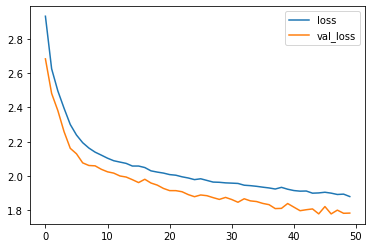

In [19]:
losses.plot()

In [20]:
from sklearn.metrics import classification_report, accuracy_score, average_precision_score

In [21]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [22]:
predictions[1]

18

In [23]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0.], dtype=float32)

In [24]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

18

In [25]:
print(accuracy_score(rounded_labels,predictions))

0.41997792494481234


In [26]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       429
           1       0.46      0.21      0.29       394
           2       0.08      0.00      0.00       435
           3       0.54      0.51      0.52       423
           4       0.89      0.68      0.77       413
           5       0.70      0.39      0.50       425
           6       0.08      0.02      0.03       429
           7       0.20      0.00      0.00       448
           8       0.78      0.55      0.65       444
           9       0.92      0.74      0.82       428
          10       0.09      0.60      0.15       422
          11       0.99      0.87      0.93       415
          12       0.21      0.29      0.24       434
          13       0.57      0.32      0.41       434
          14       0.00      0.00      0.00       461
          15       0.10      0.31      0.15       425
          16       0.23      0.05      0.08       448
          17       1.00    

In [31]:
from sklearn.metrics import confusion_matrix
conf_mst = confusion_matrix(rounded_labels,predictions)
from sklearn.metrics import plot_confusion_matrix


In [33]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [34]:
list_labels = np.arange(22)
print(list_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


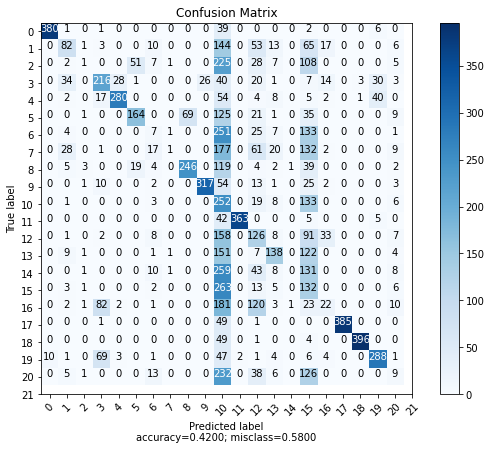

In [35]:
plot_confusion_matrix(cm           = conf_mst, 
                      normalize    = False,
                      target_names = list_labels,
                      title        = "Confusion Matrix")
